# Week 6 notes

## Selection statements (if-statements)

In [ ]:
# temp = field 1, humid = field 2

user_input = input('Type temp or humid or rain:')

if user_input == 'temp':
    print(1)
    
elif user_input == 'humid':
    print(2)

elif user_input == 'rain':
    print(3)
    
else:
    print('You did not enter temp or humid')
    

## use a selection statement to compare numbers

In [ ]:
# ask for for their quiz grade if they earn a 90 or above print You earn an A, otherwise print, keep working hard

grade = input('What did you earn on your quiz?')
grade = float(grade)

if grade >= 90:
    print('You earned an A')
else:
    print('keep working hard')


## use a selection statement to run a calculation

In [13]:
# ask the user for a mass and volume, print back to the user the calculated density

m = input('What is the mass?')
v = input('What is the volume')
m = float(m)
v = float(v)
if v<=0:
    print('can not have a negative or zero volume')
else:
    d = m/v
    print('The density is:',d)
    print(d)

print('All done!')

What is the mass?5
What is the volume0
can not have a negative or zero volume
All done!


## Web API's

In [ ]:
# url: https://api.thingspeak.com/channels/10/fields/2.json?results=20

n = input('How many data points?:')
field_num = input('Which field number?')

part1 = 'https://api.thingspeak.com/channels/'
part2 = '10'
part3 = '/fields/'
part4 = field_num
part5 ='.csv?results='
part6 = n

url = part1+part2+part3+part4+part5+part6
url

In [ ]:
import pandas as pd
df = pd.read_csv(url)
df.tail()

## Read in a csv data file and caculate some statistics

In [14]:
%ls

 Volume in drive C is Windows
 Volume Serial Number is 44E5-0D98

 Directory of C:\Users\student\Desktop

02/12/2019  03:11 PM    <DIR>          .
02/12/2019  03:11 PM    <DIR>          ..
02/12/2019  02:22 PM    <DIR>          .ipynb_checkpoints
02/12/2019  03:11 PM               300 grade_data.csv
05/13/2016  12:33 PM               210 MSDS Online.url
06/10/2015  01:29 PM    <DIR>          Safety Information
02/12/2019  03:01 PM             3,836 week6_notes.ipynb
               3 File(s)          4,346 bytes
               4 Dir(s)  299,238,313,984 bytes free


In [35]:
# imports (pandas, numpy)

import numpy as np
import pandas as pd
from scipy import stats

# read in the csv datafile into a pandas dataframe

df = pd.read_csv('grade_data.csv', header=None)   #don't want the first value in the csv file to be be the col header
grades = np.array(df)

# calculate the mean, median, mode

mean = np.mean(grades)
median = np.median(grades)
mode = stats.mode(grades)

# print out to the user what then mean, median and mode of the grade data is

print('The average grade is:',mean)
print('The median grade is:',median)
print('The most often grade is:',mode[0][0][0])

The average grade is: 80.45
The median grade is: 81.0
The most often grade is: 79


## Plot a stress strain curve and find the tensile strength (max of stress) and the strain value where the tensile strength occurs

In [36]:
# imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
# bring in the excel file
# %ls   # look in same folder as the jupyter notebook is running in to see if the excel file is present
df = pd.read_excel('stress-strain.xlsx', header=None)
data = np.array(df)

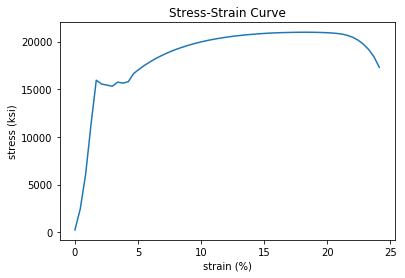

In [43]:
# build a plot

# get the data
stress = data[:,1]  # the stress values are in the 2nd column, the col index 1
strain = data[:,2]  # the strain values are in the 3rd column, the col index 2

# plot the data
fig, ax = plt.subplots()  
ax.plot(strain,stress)        #strain on the x-axis, stress on the y-axis

# customize
ax.set_xlabel('strain (%)')
ax.set_ylabel('stress (ksi)')
ax.set_title('Stress-Strain Curve')
# show
plt.show()

In [44]:
# calculate the tensile strength(max stress)
t_strength = np.max(stress)
#t_strength

20979.50083

In [50]:
# calculate the strain value where the tensile strength occurs
#using a boolean mask
mask = data[:,1]==t_strength
strain_at_t_strength = data[mask,2]

#using np.where
loc = np.where(data[:,1]==t_strength)
strain_at_t_strength = float(data[loc,2])
strain_at_t_strength      

18.2033418

In [51]:
# print back to the user the tensile strength and the strain value were the tensile strength occurs

print('The tensile strength is:',t_strength)
print('The strain at the tensile strength is:',strain_at_t_strength)

The tensile strength is: 20979.50083
The strain at the tensile strength is: 18.2033418
